In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def peaks(x, y):
    #mesh grid dùng để tạo hai mảng 2 chiều từ x, y(số hàng là y, số cột là x), tổng số phần tử là x * y
    x, y = np.meshgrid(x, y)
    return 3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2) - 10 * ((x / 5) - x**3 - y**5) * np.exp(-x**2 - y**2) - (1 / 3) * np.exp(-(x + 1)**2 - y**2)


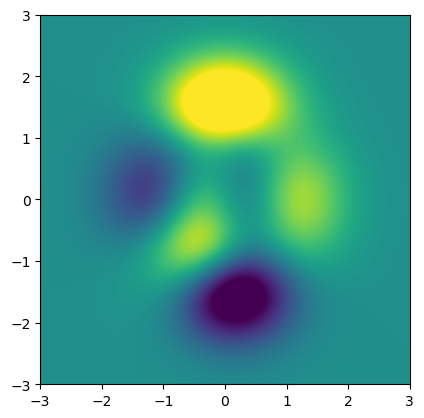

In [30]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
z = peaks(x, y)
#extend là giá trị biên trên từng trục, vmin và vmax là threshold 
#để xác định độ sáng tối cả vùng dựa vào giá trị z được tính ở hàm peaks 
plt.imshow(z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [4]:
x, y = sp.symbols("x y")
func = 3 * (1 - x)**2 * sp.exp(-x**2 - (y + 1)**2) - 10 * ((x / 5) - x**3 - y**5) * sp.exp(-x**2 - y**2) - (1 / 3) * sp.exp(-(x + 1)**2 - y**2)
df_dx = sp.lambdify((x,y), sp.diff(func, x), "sympy")
df_dy = sp.lambdify((x,y), sp.diff(func, y), "sympy")

In [5]:
result_dx = df_dx(1, 1).evalf()
result_dy = df_dy(1, 1).evalf()
print(f"Partial derivative with respect to x at (1,1): {result_dx}")
print(f"Partial derivative with respect to y at (1,1): {result_dy}")
#có thể trực tiếp thay tham số vào để tính đạo hàm riêng tại x, y
#và nhận giá trị là số thập phân bằng method evalf() 

Partial derivative with respect to x at (1,1): -1.07369833656079
Partial derivative with respect to y at (1,1): 1.89918592997863


# Thực hiện quá trình train

In [60]:
# localmin = np.random.uniform(-2, 2, 2)
localmin = [0, 1.4]
print(localmin)
epochs = 1000
lr = 0.01
localmin_x = localmin[0]
localmin_y = localmin[1]
trajectory = np.zeros((epochs, 2))
for i in range (epochs): 
    localmin_x = localmin_x - lr * df_dx(localmin_x, localmin_y)
    localmin_y = localmin_y - lr * df_dy(localmin_x, localmin_y)
    trajectory[i, :] = np.array([localmin_x, localmin_y])
print(trajectory[-1])

[0, 1.4]
[0.29644555 0.32019625]


# Trực quan hóa 

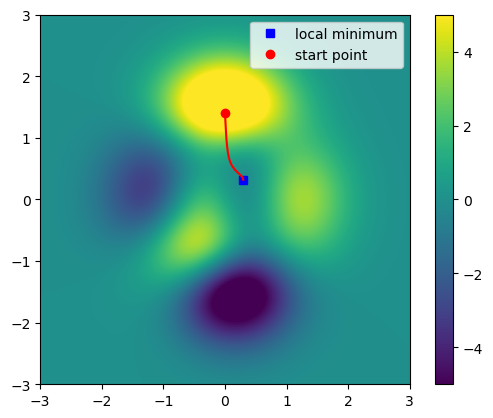

In [61]:
plt.imshow(z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(trajectory[-1][0], trajectory[-1][1], "bs")#Plot điểm cực trị 
plt.plot(localmin[0], localmin[1], "ro")#Plot giá trị khởi tạo
plt.legend(["local minimum","start point"])
plt.plot(trajectory[:,0], trajectory[:,-1], "r")#Plot quỹ đạo 
plt.colorbar()#Biểu thị thang màu độ sâu 
plt.show()